In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

scaler= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")

scaler.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [195]:
scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [196]:
scaler.shape

(205843, 7)

In [197]:
# Renaming the columns
scaler.rename(columns={"Unnamed: 0":"Index","company_hash":"Employer","email_hash":"Learner_UID"}, inplace= True)
scaler.head()

,Index,Employer,Learner_UID,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [198]:
scaler.describe()

,Index,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [199]:
# Not available data
scaler.isna().sum()

Index                   0
Employer               44
Learner_UID             0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [200]:
# Unavailable Employer details row can be droped from the data set.
scaler.dropna(subset=["Employer"], inplace=True)

In [201]:
scaler.shape

(205799, 7)

In [202]:
scaler["orgyear"].value_counts(ascending=True)
# It contain some wrong values of year of joining.

orgyear
200.0         1
208.0         1
206.0         1
1973.0        1
2106.0        1
          ...  
2015.0    20606
2016.0    23042
2017.0    23234
2019.0    23420
2018.0    25247
Name: count, Length: 77, dtype: int64

In [203]:
scaler["Employer"].nunique()

37299

In [204]:
scaler["Learner_UID"].nunique()

153411

In [205]:
scaler["job_position"].nunique()

1016

In [206]:
scaler["ctc_updated_year"].nunique()

7

In [207]:
scaler["ctc_updated_year"].value_counts(ascending=True)

ctc_updated_year
2015.0     2927
2016.0     5498
2018.0     6742
2017.0     7559
2020.0    49436
2021.0    64961
2019.0    68676
Name: count, dtype: int64

In [208]:
duplicate= scaler[scaler.duplicated(subset=["Employer","Learner_UID","orgyear","ctc","job_position","ctc_updated_year"])]
duplicate.shape
# 34 duplicate values are observed in the dataset weather the 153411 Learner_UID details are listed in the dataset.

(34, 7)

In [209]:
scaler.drop_duplicates(inplace=True, subset=["Employer","Learner_UID","orgyear","ctc","job_position","ctc_updated_year"])
scaler.shape

(205765, 7)

In [210]:
scaler["orgyear"]= scaler["orgyear"].fillna(scaler["orgyear"].mode()[0])
scaler.isna().sum()

Index                   0
Employer                0
Learner_UID             0
orgyear                 0
ctc                     0
job_position        52517
ctc_updated_year        0
dtype: int64

In [211]:
scaler["job_position"].value_counts()

job_position
Backend Engineer                 43545
FullStack Engineer               24708
Other                            18067
Frontend Engineer                10417
Engineering Leadership            6870
                                 ...  
PhD. Student                         1
Front-End Developer                  1
ayS                                  1
Principal Product Engineer           1
Android Application developer        1
Name: count, Length: 1016, dtype: int64

In [212]:
# orgyear should lie between year of 1973 to 2024. Other than that shall be wrong entries.
scaler= scaler[(scaler["orgyear"] >= 1970) & (scaler["orgyear"] <= 2024)]
scaler.shape

(205678, 7)

In [213]:
scaler["job_position"].replace(np.nan, "Not_Available", inplace= True)

scaler.isna().sum()

<ipython-input-213-b6798e77f43d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaler["job_position"].replace(np.nan, "Not_Available", inplace= True)


Index               0
Employer            0
Learner_UID         0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [214]:
scaler["Learner_UID"].value_counts()

Learner_UID
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
                                                                    ..
97c2f5deea418aa1f209002b79213f947efed3b651f0c7e5fb5ec97adb49a823     1
a9560804241d30092205375646cd9c0df1c4a49204e678b6304ddfa3190c30eb     1
27b108c30712470ccecba68203919d34b4d9d33820591bbe04de97e8cfd4a18f     1
6532c17e1ccf91704284d413f7c5de7ac84291c5097609449b0357260533d2e8     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: count, Length: 153343, dtype: int64

In [215]:
scaler.loc[scaler["Learner_UID"]=="298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee"]

# This is not possible for any individual learner/ employee to have several positions in same company and between same time pd.
# Some fault and duplicacy is presence.

,Index,Employer,Learner_UID,orgyear,ctc,job_position,ctc_updated_year
65909,65999,cvrhtbgbtznhb,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,2018.0,720000,Backend Engineer,2020.0
72799,72900,cvrhtbgbtznhb,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,2018.0,720000,Research Engineers,2020.0
82099,82232,cvrhtbgbtznhb,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,2018.0,720000,Other,2020.0
93495,93673,cvrhtbgbtznhb,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,2018.0,720000,Not_Available,2020.0
93783,93962,cvrhtbgbtznhb,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,2018.0,720000,Data Scientist,2020.0
190903,191861,cvrhtbgbtznhb,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,2018.0,700000,Other,2020.0
191498,192460,cvrhtbgbtznhb,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,2018.0,700000,Research Engineers,2020.0
196685,197691,cvrhtbgbtznhb,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,2018.0,700000,Data Scientist,2020.0
201587,202639,cvrhtbgbtznhb,298528ce3160cc761e4dc37a07337ee2e0589df251d736...,2018.0,700000,Backend Engineer,2020.0


In [216]:
scaler.loc[scaler["Learner_UID"]=="bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b"]

,Index,Employer,Learner_UID,orgyear,ctc,job_position,ctc_updated_year
24109,24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Not_Available,2020.0
45984,46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Not_Available,2019.0


In [217]:
scaler=scaler.groupby("Learner_UID").first().reset_index()
scaler.shape

(153343, 7)

In [218]:
# Cleaning text column- such as Employer
import re
text = ['Employer']
for i in text:
    scaler[i] = scaler[i].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

In [219]:
# New Feature- Year of Experiance
scaler["Work_X"]= scaler["ctc_updated_year"] - scaler["orgyear"]

In [220]:
# check for the error/ -ve value of the Work_X
# These many rows are not accurate as
scaler[scaler["Work_X"] < 0]

,Learner_UID,Index,Employer,orgyear,ctc,job_position,ctc_updated_year,Work_X
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,51626,Gunhb,2021.0,1300000,Not_Available,2019.0,-2.0
26,000dbb08ff8c14f7c6d4729e0d9015c48cc57c6de27cf2...,189877,Bxwqgogen Qa Xzaxv Uqxcvnt Rna,2016.0,1650000,Not_Available,2015.0,-1.0
45,0011de50390ba4a97b397299563fcaddc566721bb6b76a...,21868,Onvqnhu,2021.0,600000,Not_Available,2020.0,-1.0
46,0011e65b6e10124592d9ecfae362d16ae8587309947d12...,63294,Bgmonvw,2018.0,1100000,Backend Engineer,2016.0,-2.0
51,00149de9bcbf2423568b9c6b6fabdf6c97a5ca346d6674...,71056,Nyt A T Oyvf Sqghu,2018.0,2100000,Backend Engineer,2017.0,-1.0
...,...,...,...,...,...,...,...,...
153226,ffc7b3c4381194b6c405cd469f0862be6d209518d50228...,179304,Eqtoytq,2018.0,300000,Other,2017.0,-1.0
153241,ffcf5925a8dc00fe70d297b563a0e55623c06b97552c0d...,92557,Vouxqt Ojontbo,2021.0,540000,Not_Available,2020.0,-1.0
153276,ffdff697bf764afd630b47586f36c67bc8bed7a14b20a5...,170274,Fgqptd,2016.0,1000000,FullStack Engineer,2015.0,-1.0
153284,ffe39c3314bdfdcd49d0bcdcd6b5e056b2233266eb36ac...,90712,Sqvahvnt Onhatzn,2023.0,1200000,FullStack Engineer,2021.0,-2.0


In [221]:
scaler= scaler[scaler["Work_X"] >= 0]
scaler.shape

(146190, 8)

###EDA

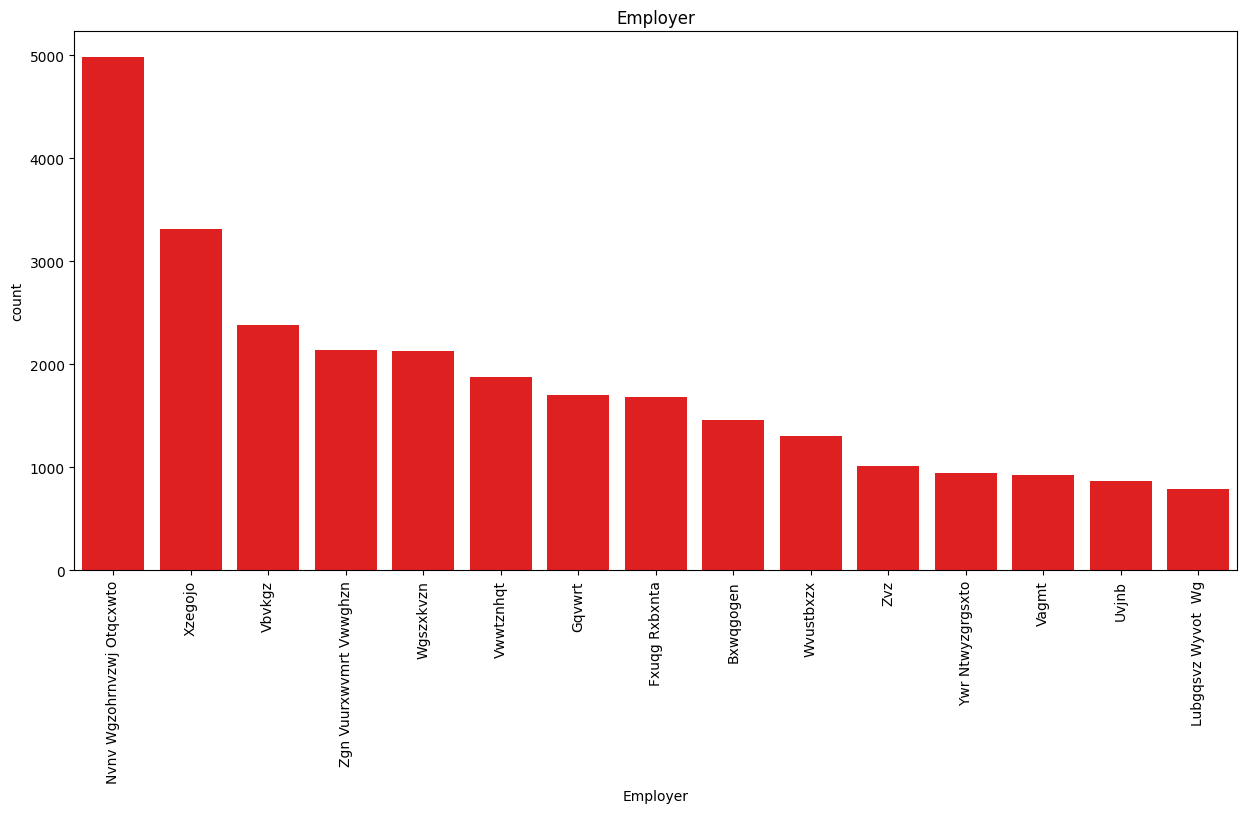

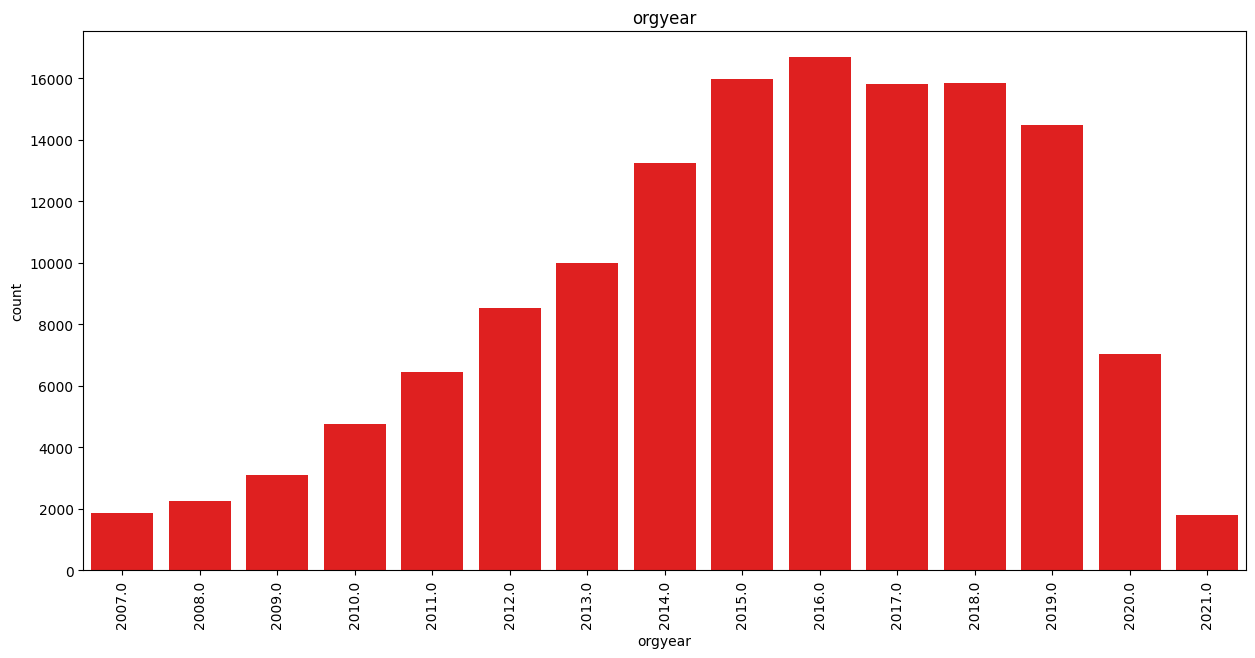

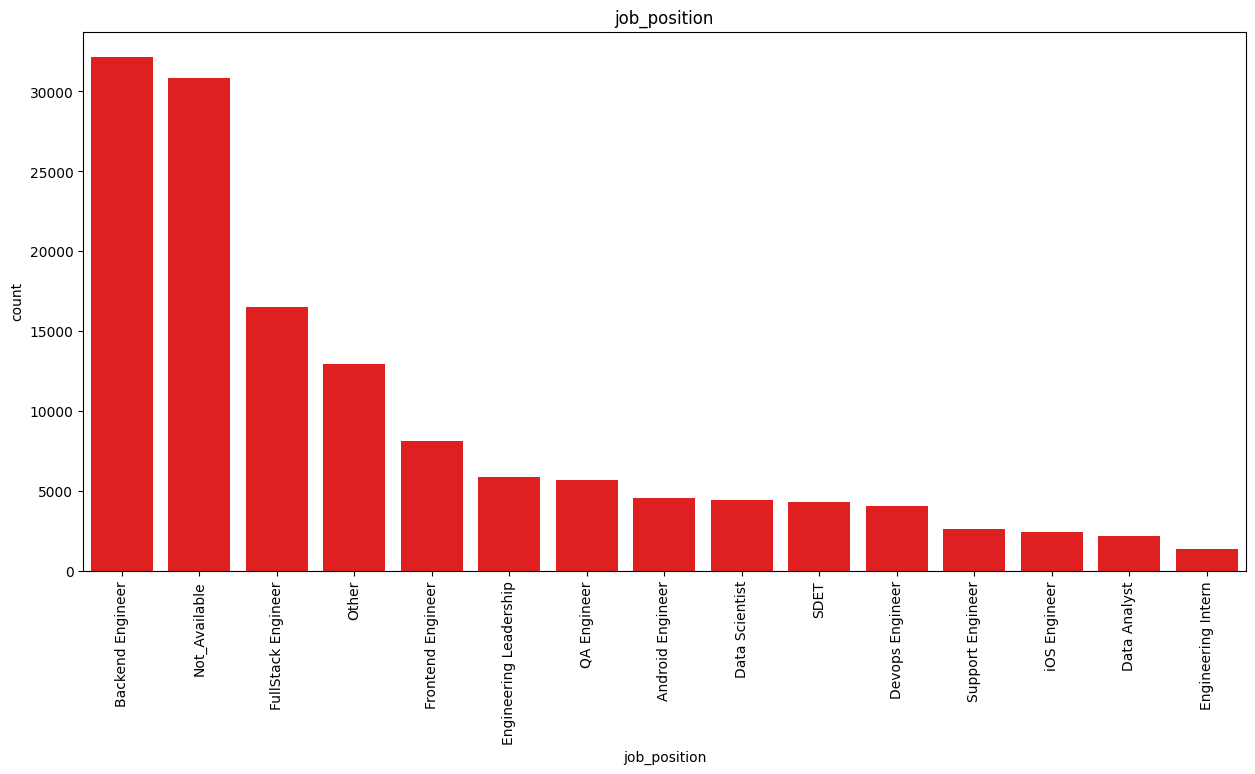

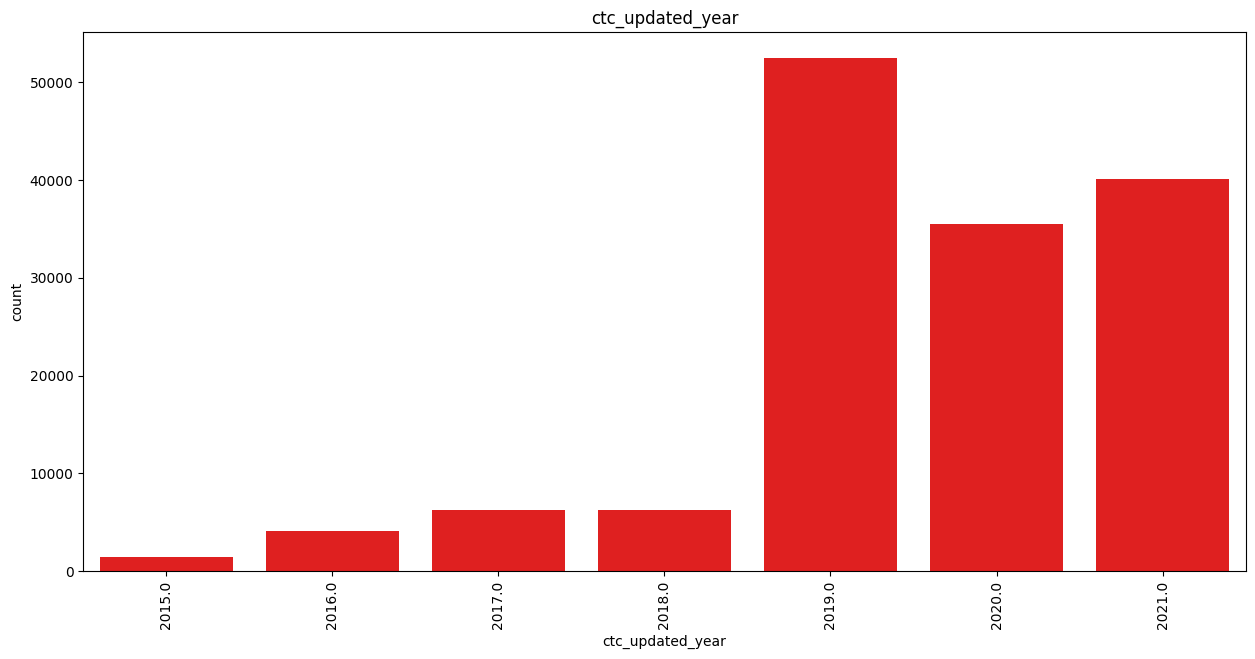

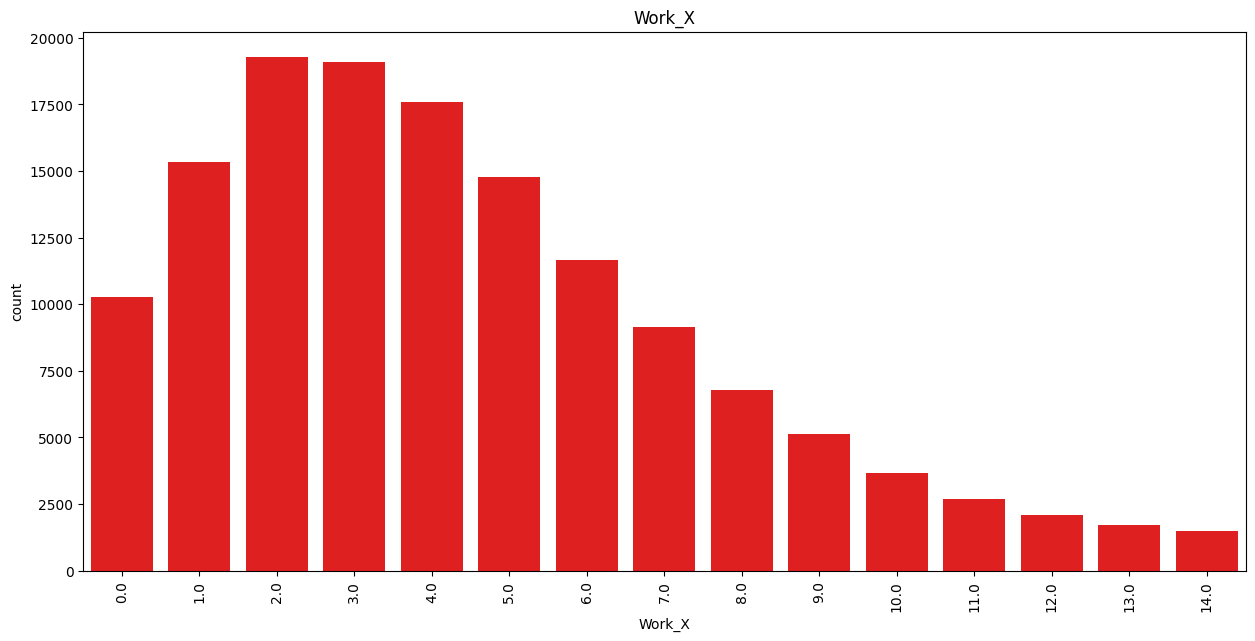

In [222]:
columns=["Employer","orgyear","job_position","ctc_updated_year","Work_X"]
for p in columns:
  dwg=scaler.copy()
  dwg["count"] = 1
  dwg= dwg.groupby(p).sum()["count"].reset_index().sort_values("count",ascending=False).head(15)
  plt.figure(figsize=(15,7))
  sns.barplot(data= dwg, y="count",x=p, color="red")
  plt.title(p)
  plt.xticks(rotation=90)
  plt.show()

<Axes: xlabel='ctc'>

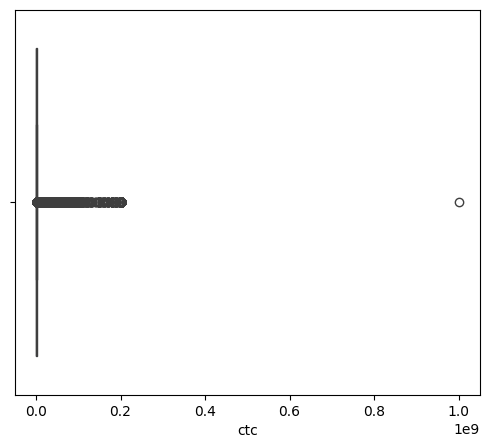

In [223]:
# As the range of the CTC is very broad i.e. 2 to 1000000000
# outlier detection and removal
plt.figure(figsize= (6,5))
sns.boxplot(data= scaler, x="ctc")

In [224]:
scaler= scaler[scaler["ctc"]>500000]

In [225]:
R1= np.percentile(scaler["ctc"],25)
R2= np.percentile(scaler["ctc"],75)
IQR= R2-R1

print(scaler.shape)
cols = ['ctc']

scaler = scaler[~((scaler[cols] < (R1 - 1.5 * IQR)) |(scaler[cols] > (R2 + 1.5 * IQR))).any(axis=1)]
print(scaler.shape)

(111721, 8)
(104023, 8)


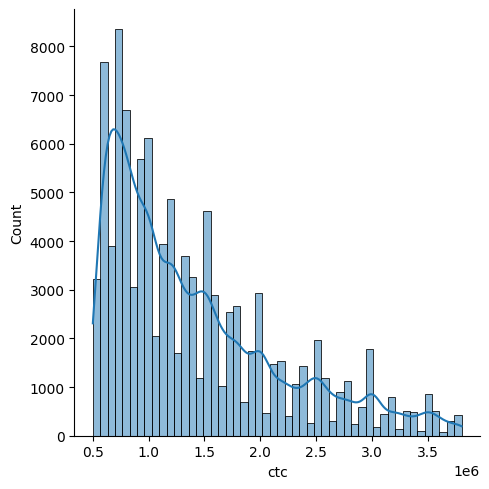

In [226]:
sns.displot(scaler["ctc"],kde=True,bins=50)
plt.show()

<Axes: ylabel='ctc'>

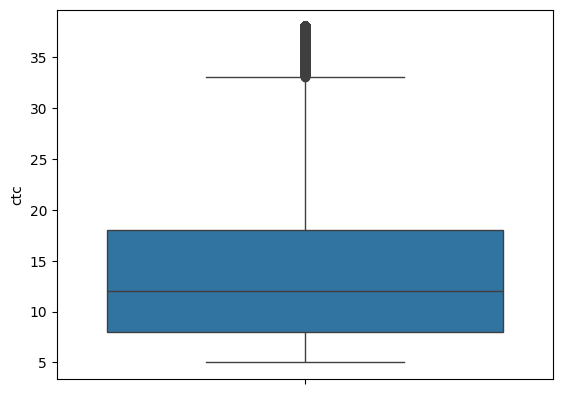

In [227]:
sns.boxplot(scaler["ctc"]/100000)

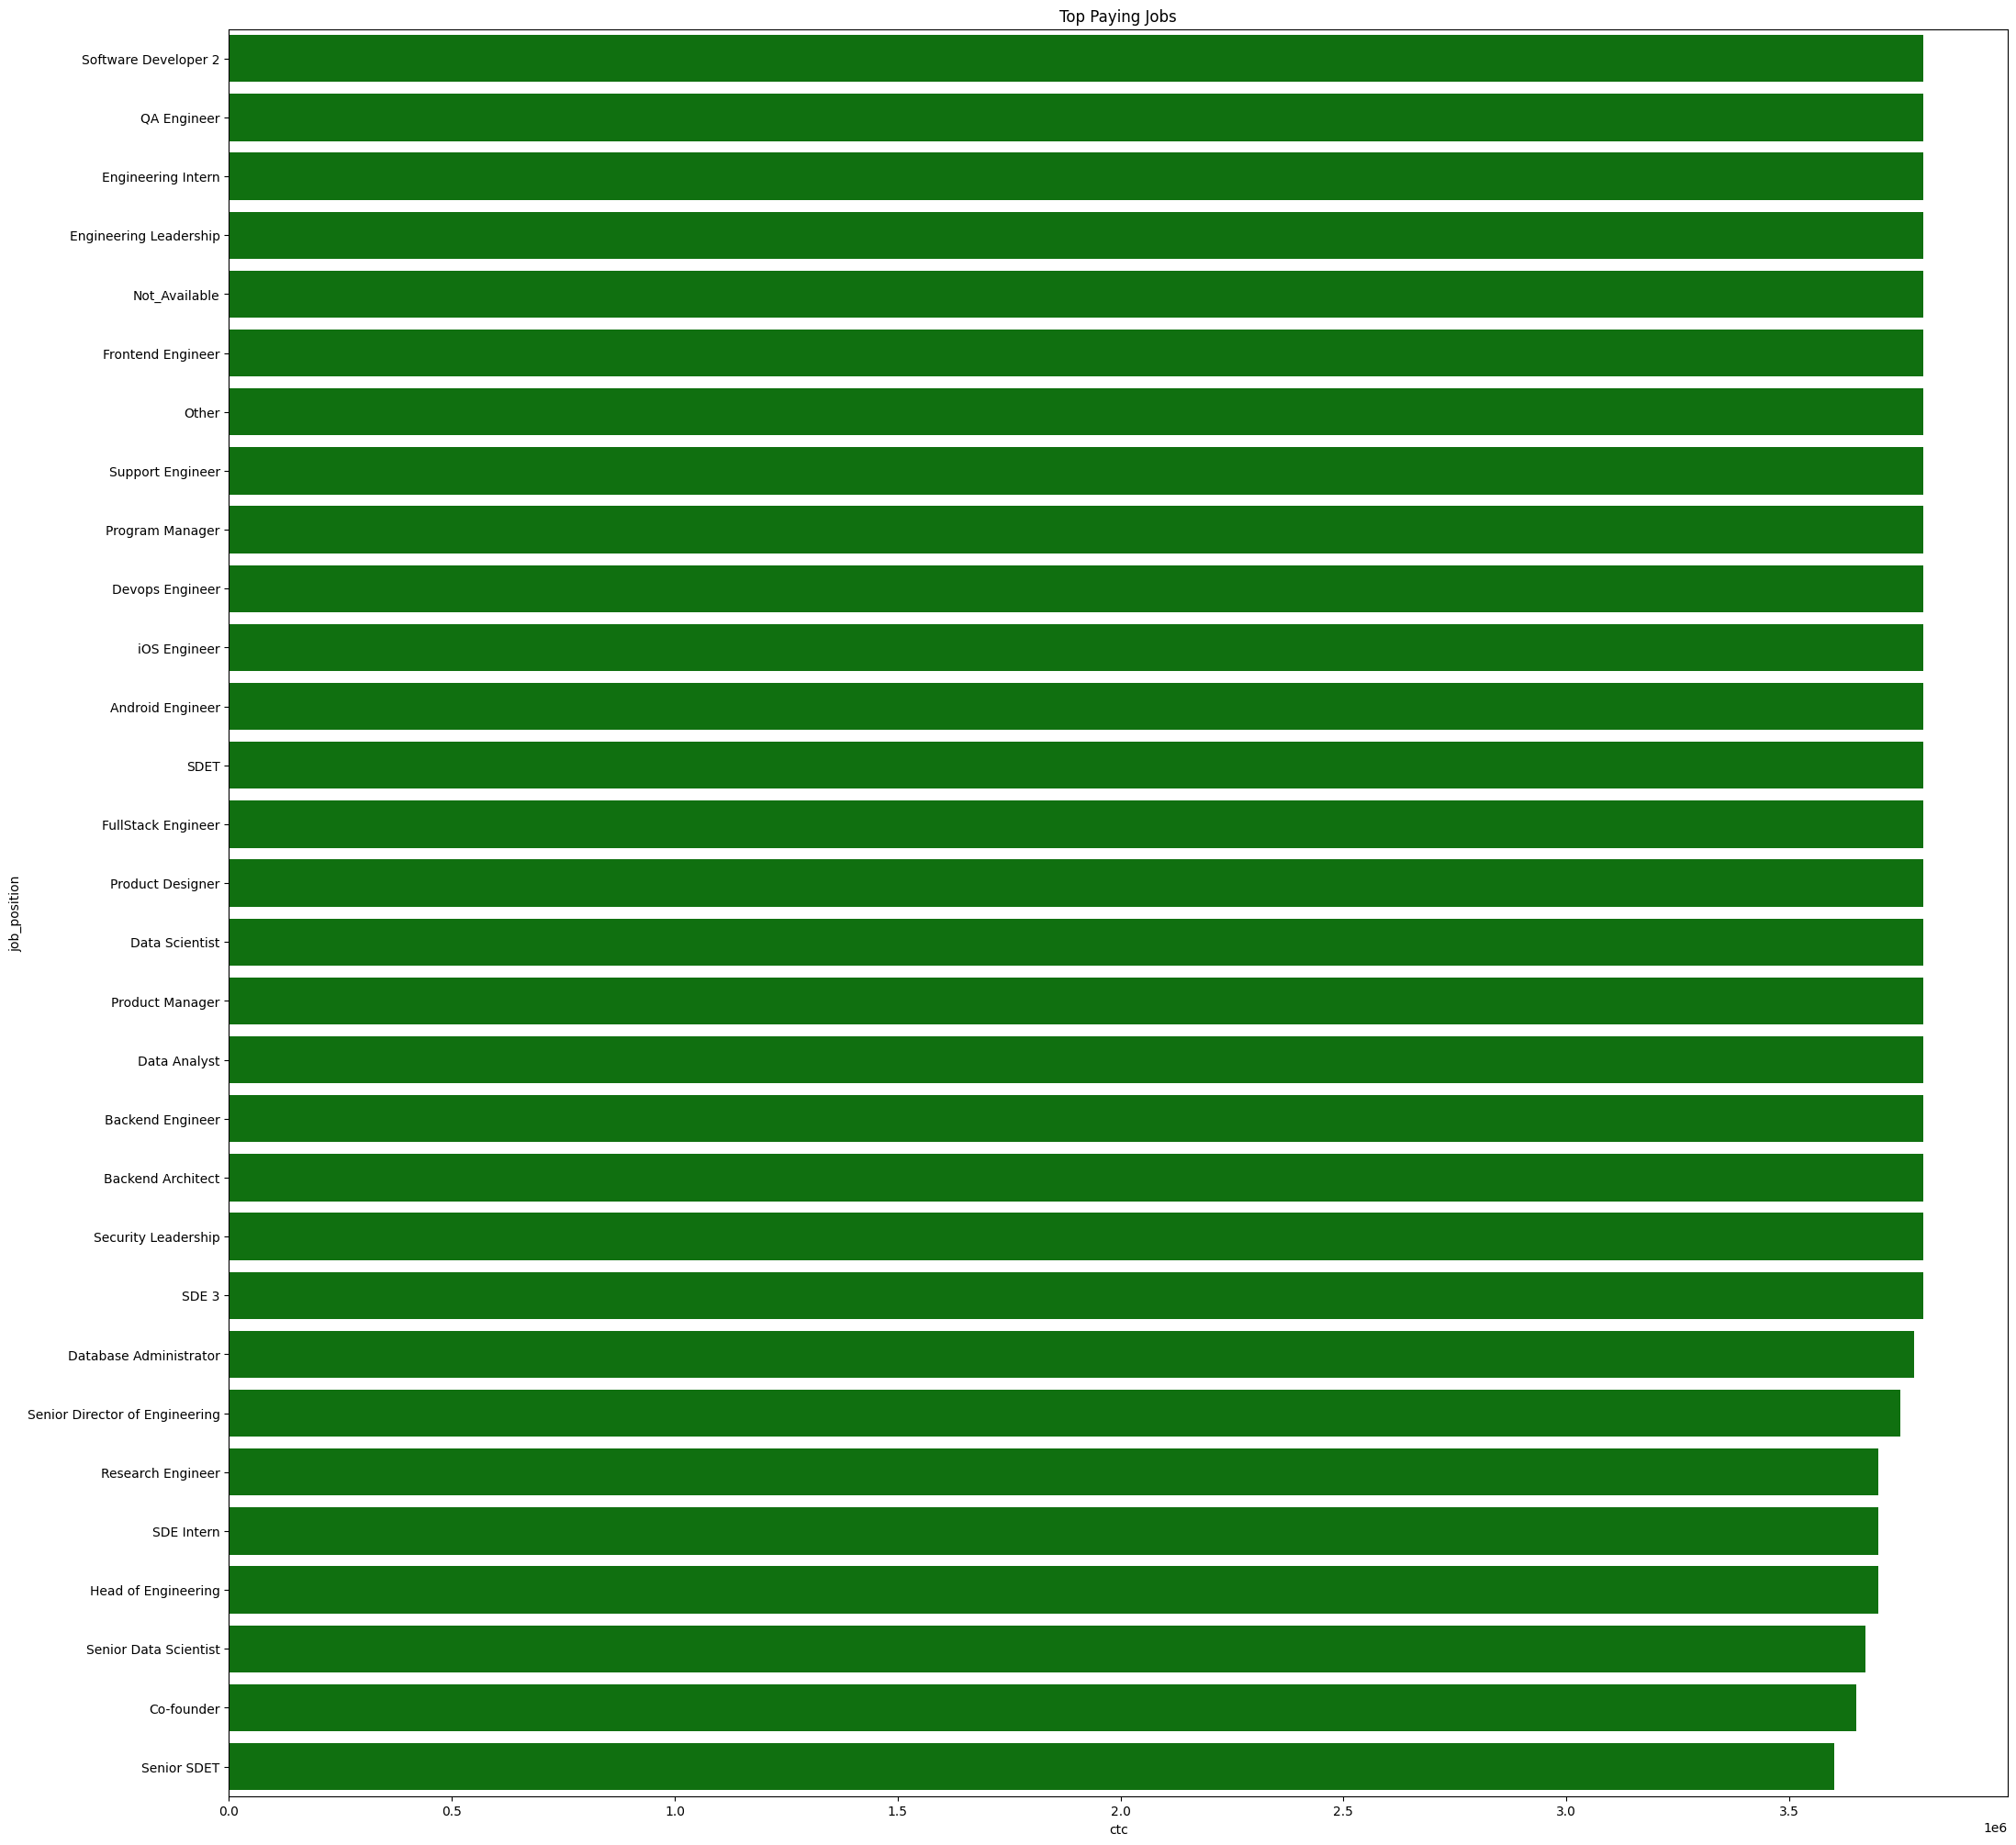

In [228]:
dwg = scaler.copy()
dwg = dwg.groupby(['job_position']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(30)
plt.figure(figsize=(25,25))
sns.barplot(data=dwg,x='ctc',y='job_position',color="green").set(title="Top Paying Jobs")
plt.show()
JP=list(dwg["job_position"])

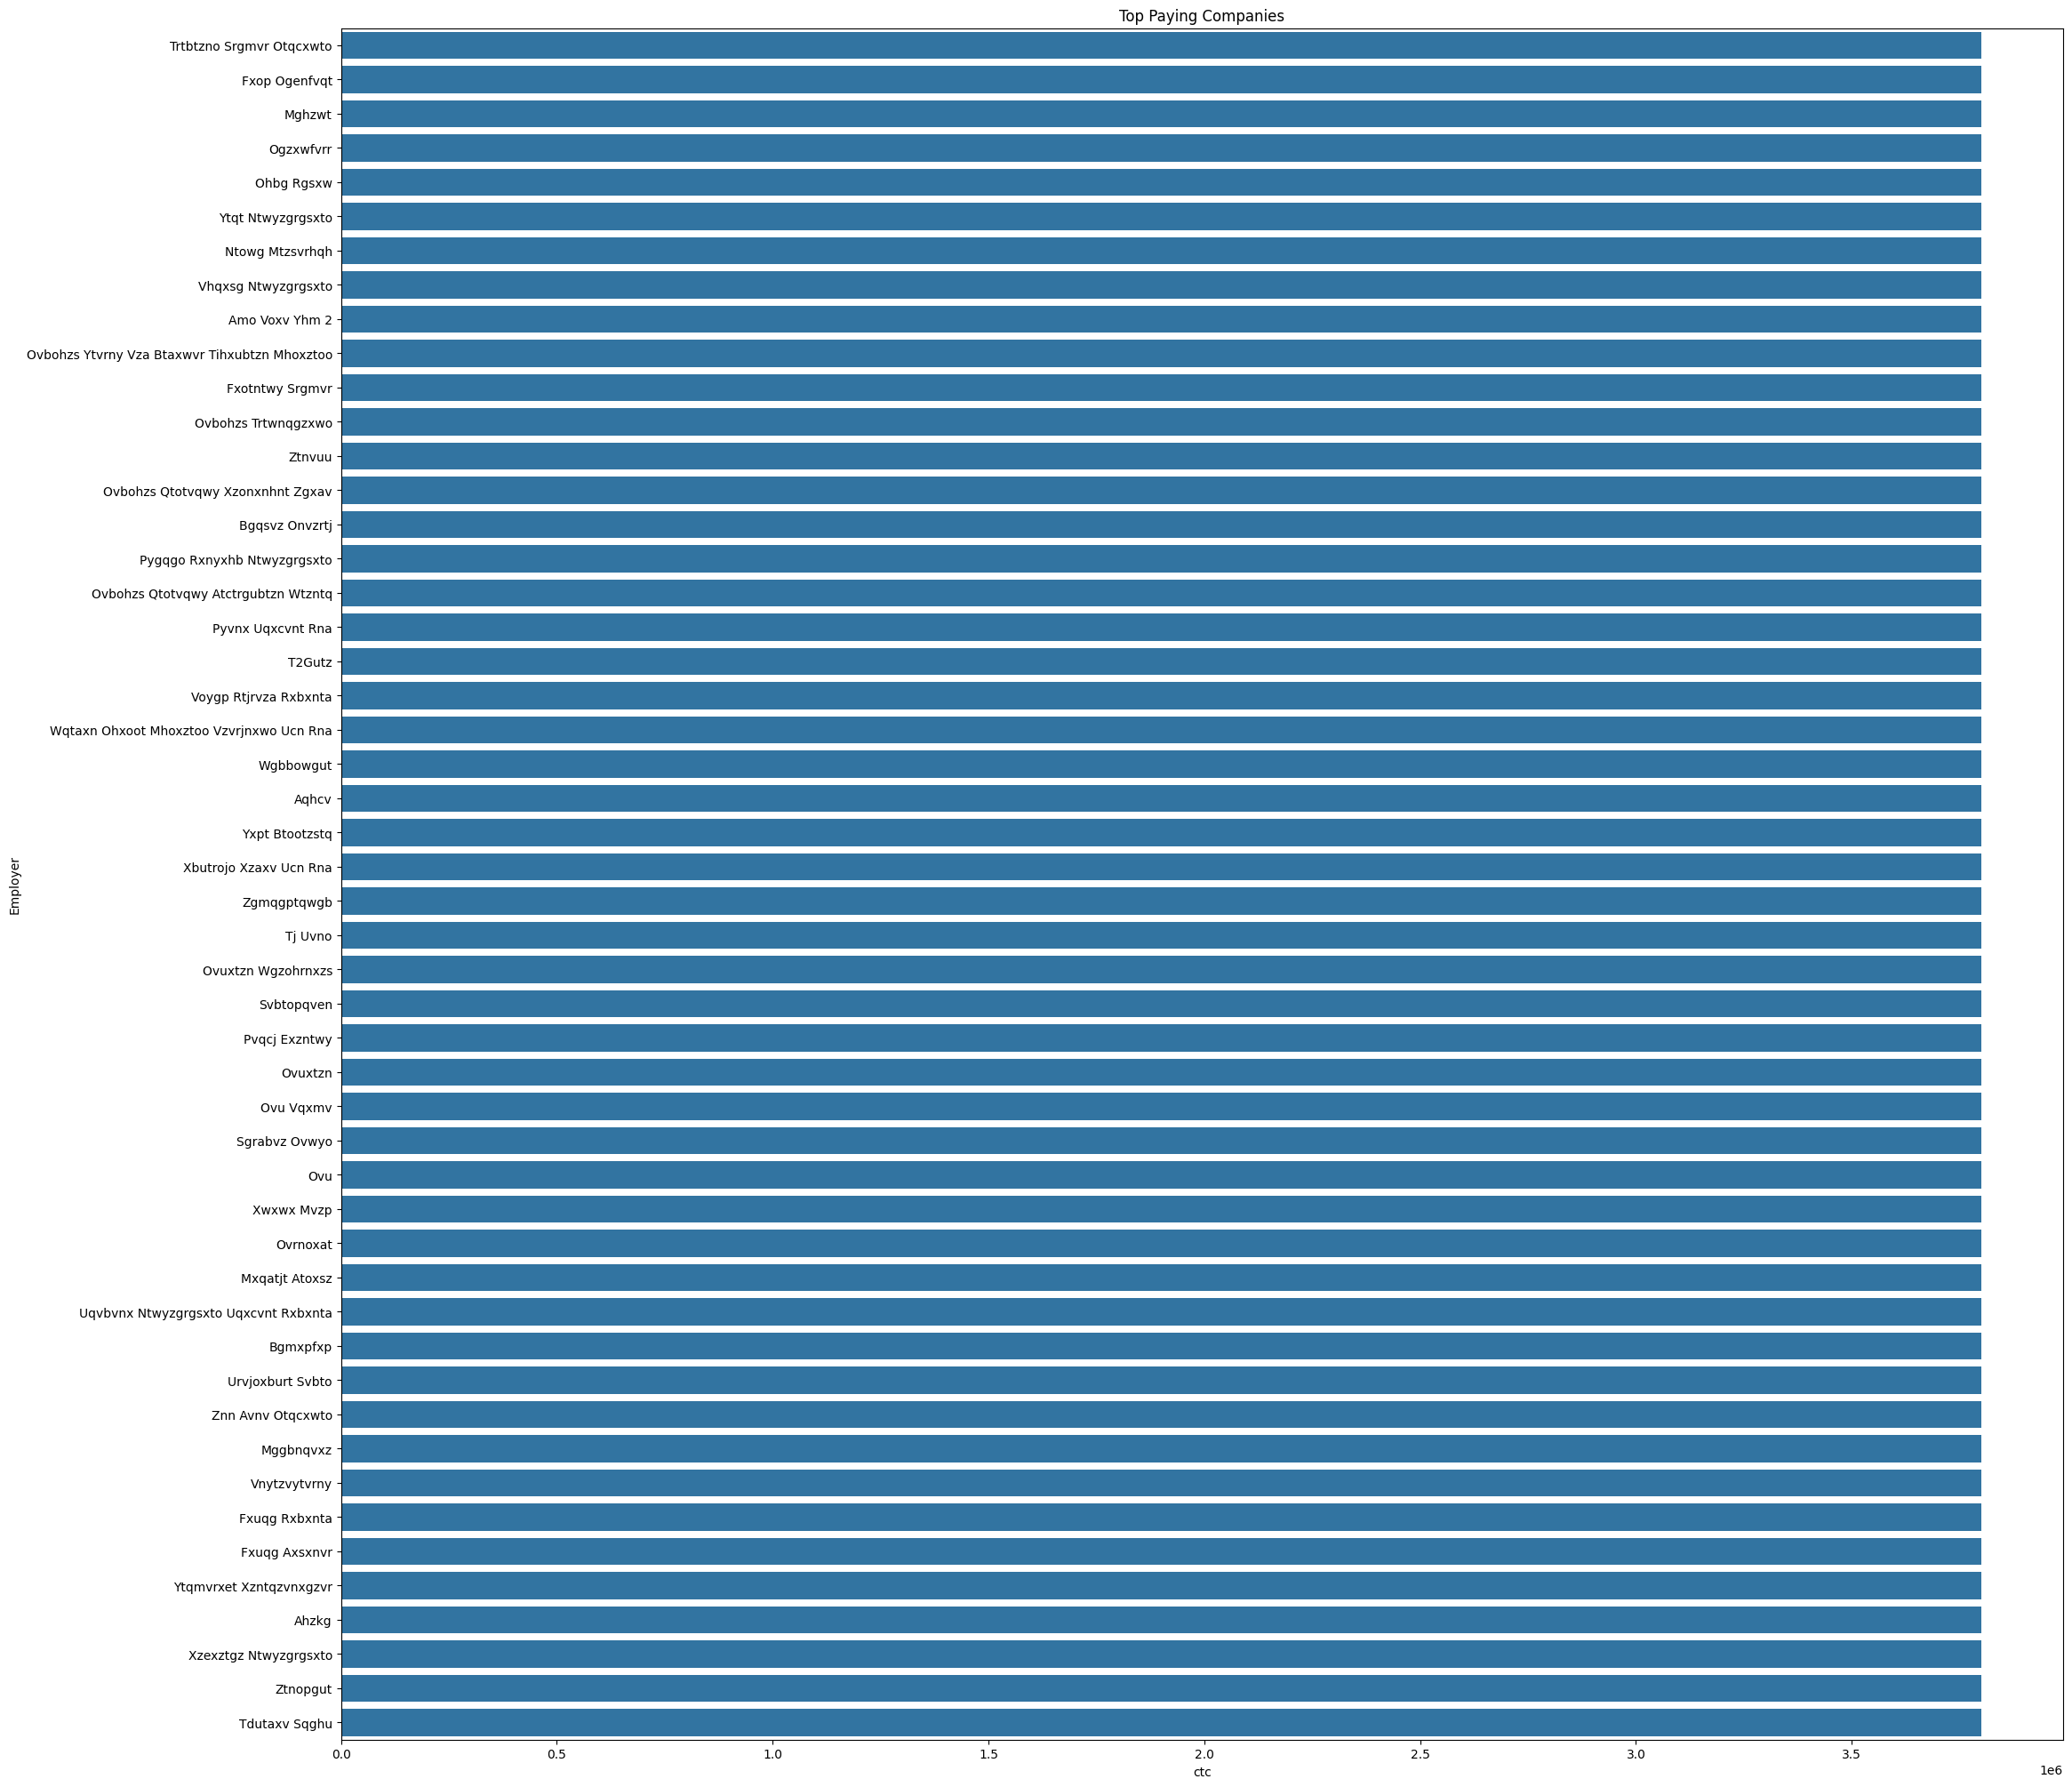

In [229]:
dwg = scaler.copy()
dwg = dwg.groupby(['Employer']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(25,25))
sns.barplot(data=dwg,x='ctc',y='Employer').set(title="Top Paying Companies")
plt.show()

Com=list(dwg["Employer"])

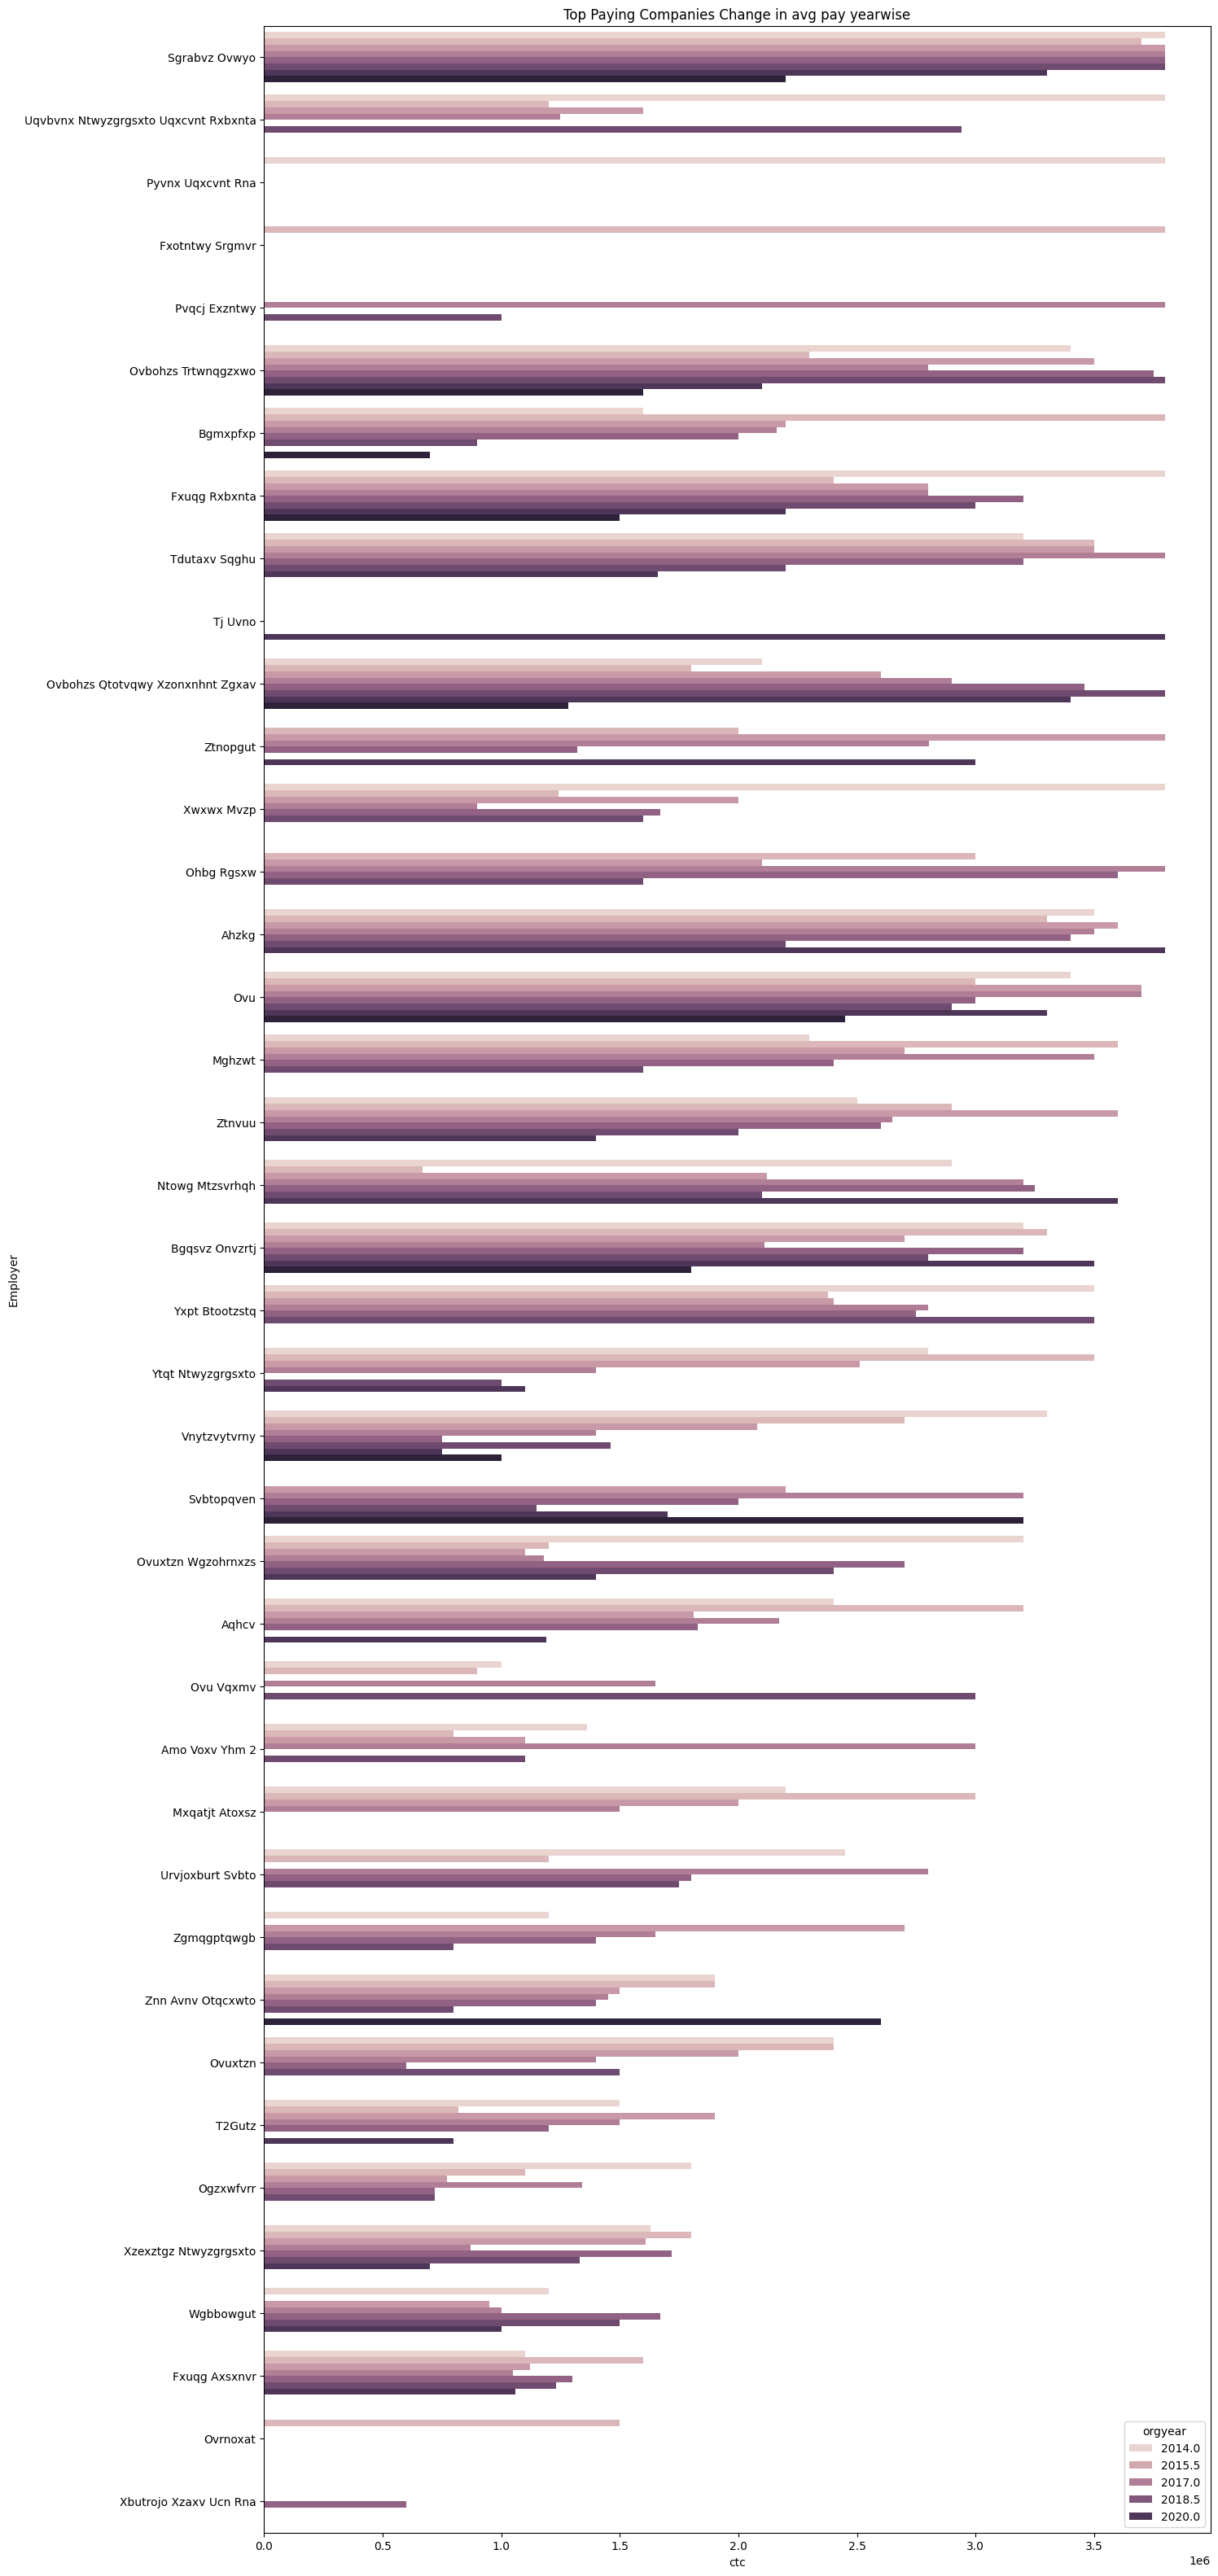

In [230]:
dwg = scaler.copy()
dwg = dwg[dwg['Employer'].isin(Com)]
dwg = dwg[dwg['orgyear'] >= 2014]
dwg = dwg.groupby(['Employer','orgyear']).max()['ctc'].reset_index().sort_values('ctc',ascending=False)
plt.figure(figsize=(15,40))
sns.barplot(data=dwg,x='ctc',y='Employer',hue='orgyear').set(title="Top Paying Companies Change in avg pay yearwise")
plt.show()

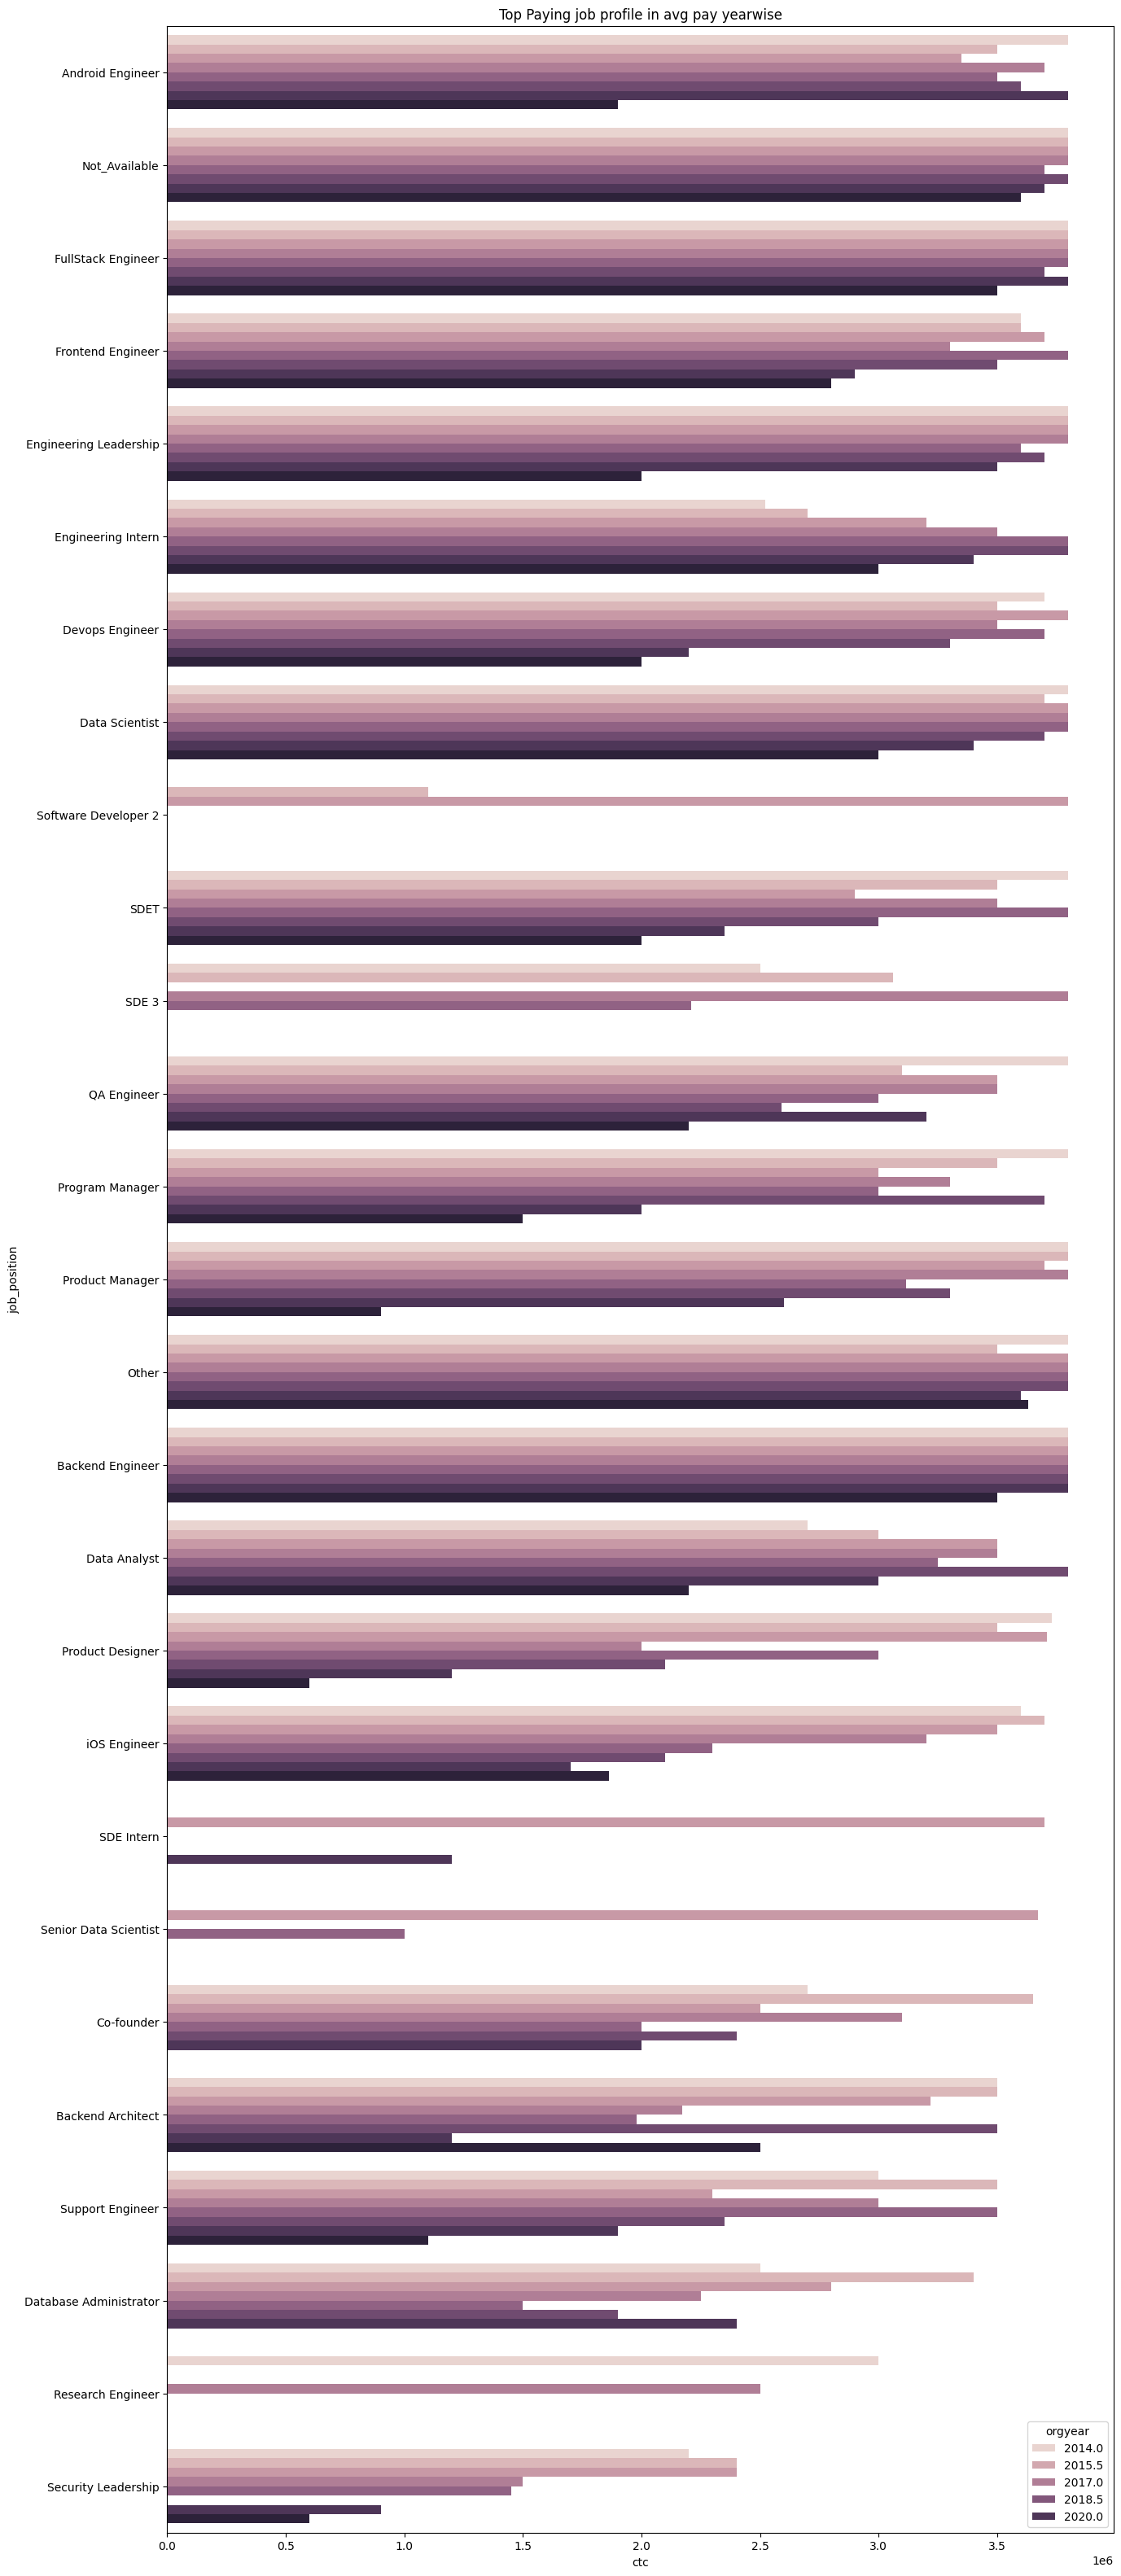

In [231]:
dwg = scaler.copy()
dwg = dwg[dwg['job_position'].isin(JP)]
dwg = dwg[dwg['orgyear'] >= 2014]
dwg = dwg.groupby(['job_position','orgyear']).max()['ctc'].reset_index().sort_values('ctc',ascending=False)
plt.figure(figsize=(15,40))
sns.barplot(data=dwg,x='ctc',y='job_position',hue='orgyear').set(title="Top Paying job profile in avg pay yearwise")
plt.show()

###Manual Clustering

In [234]:
grp = ['Employer','job_position','Work_X']
data_tmp1 = scaler.groupby(grp).agg({'ctc':['mean','median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)

datatmp = scaler.merge(data_tmp1[['Employer','job_position','Work_X', 'mean ctc']],on=['Employer','job_position','Work_X'],how='left')

col1 = 'ctc'
col2 = 'mean ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Designation'] = np.select(conditions, choices, default=np.nan)

In [235]:
grp = ['Employer','job_position']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean2','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)

datatmp = datatmp.merge(data_tmp1[grp + ['mean2 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean2 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Class'] = np.select(conditions, choices, default=np.nan)

In [236]:
grp = ['Employer']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean3','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)

datatmp = datatmp.merge(data_tmp1[grp + ['mean3 ctc']],on=grp,how='left')

col1 = 'ctc'
col2 = 'mean3 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Tier'] = np.select(conditions, choices, default=np.nan)

In [237]:
datatmp['diff_desig'] = datatmp['ctc'] - datatmp['mean ctc']
datatmp['diff_class'] = datatmp['ctc'] - datatmp['mean2 ctc']
datatmp['diff_tier'] = datatmp['ctc'] - datatmp['mean3 ctc']

**Top 10 employees (earning more than most of the employees in the company) - Tier 1**

In [238]:
datatmp[datatmp['Tier'] == 1].sort_values('diff_tier',ascending=False).head(10)[['Learner_UID','ctc','mean3 ctc']]

,Learner_UID,ctc,mean3 ctc
6533,0f86a269256bf66fef7c75058bb28ad1cd6ba51b0326e3...,3800000,9.319549e+05
98532,f244499e41785c4cece176039f3cb06552d8ca6778e7f6...,3800000,9.530500e+05
4216,09f27edbcee6aab1244d80e1ebfed3bf3980e8f272e8f7...,3761000,9.506923e+05
35667,57d94bc528dd63c4bbe8395b8e4f445a6a408d2bba098c...,3700000,9.647983e+05
31184,4cfe2d277a077f1d0c1269b009ae12d7877c1e6dfde660...,3700000,9.647983e+05
5048,0bf9a65bba484fe9adaf30153b7c31f5d7fd1607118349...,3600000,8.658227e+05
34422,54e3dc188722e7245d101a4009b2c6dfac4ac305a60b73...,3600000,8.684614e+05
11327,1b4d14c04cb542ffaa12b2b04645568f2669587376cfbb...,3800000,1.070500e+06
58204,8f1f2914f78c5720346e1900acd016267df08d3cbd9e37...,3650000,9.449779e+05
9557,16d89c69422232cf4661e928122756e6f8655380ed5914...,3800000,1.096429e+06


**Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1**

In [241]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 1)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=False).head(10)[['Learner_UID','ctc','mean2 ctc']]

,Learner_UID,ctc,mean2 ctc
20180,31616edfc502824631b11793313d35d5bb2288319dcb25...,3800000,1.483542e+06
18850,2e0d0b9beda9ac675e112b052be2fbb734bf1c85012e23...,3800000,1.498286e+06
100458,f6e8c41a40ec308c996d498e22729359d2b564cae037a0...,3500000,1.213750e+06
100285,f67ae342b7431f7ab05eca998d904647b02711538aa839...,3750000,1.565556e+06
75293,b93f1f9ba688fde9f5f387bc18025334ebe7de175b28c8...,3779999,1.624667e+06
43394,6aa8cfeb5b98da66158e0af4ca8869362174abdba84a02...,3200000,1.083231e+06
74414,b70477650b1616a8d9e9287a1218e107c4349851606551...,3500000,1.482857e+06
90530,dee60867eba15357ba439e463c5cda178aba1b861f836e...,3800000,1.856000e+06
14063,22149acddc0e30c09575bb37b76519011e1dafca4c2cf8...,3700000,1.769000e+06
47652,751b1fb94f9054ecc14b44ebf91c3cbd92a47ea0194492...,3000000,1.091818e+06


**Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3**

In [242]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 3)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=True).head(10)[['Learner_UID','ctc','mean2 ctc']]

,Learner_UID,ctc,mean2 ctc
91431,e10edc50e41a606bb3412ba3085c4273da8c00688d60e8...,1050000,2.275000e+06
68060,a7765e6e00b19509be7604855e33dfcfde4c5f49931f5c...,1390000,2.595000e+06
17364,2a3136f6e2d03a3dbfa3f683e4ae1b744b4815a8e0177c...,1700000,2.833333e+06
67043,a4f1770283497277f8cd3b7cb04e9b5c3135815eebb4cf...,2300000,3.292500e+06
58716,9069f6772b1e7959734a115bf49b2168a888608496af50...,1900000,2.850000e+06
90529,dee5d8138d13267ebfe5dbd0eb9a37860bea9caaf55f88...,1650000,2.600000e+06
99531,f49bd18e7fe914929f6cc23bb4e7979d58290119f2adcf...,1600000,2.500000e+06
85373,d226bd26c8743a649fab3a6bb17a3318fd896c8b4fd3f4...,1570000,2.388571e+06
27088,4284c6d3434d477fbf778adfabd14a3cf7f558e14ae7af...,1450000,2.225000e+06
61997,987a063524741381c302a096e4b019f46088e519f59f4a...,2000000,2.750000e+06


**Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [243]:
datatmp[datatmp['Tier'] == 3].sort_values('diff_tier',ascending=True).head(10)[['Learner_UID','ctc','mean3 ctc']]

,Learner_UID,ctc,mean3 ctc
44907,6e68dbcbd4edcd28c37f87d96ebe6a180af4da0097e4db...,600000,2.644431e+06
43479,6ae44429a4dee1222ed1289caa2961e9ac25d4cafb2917...,600000,2.644431e+06
7647,12306b25d0d620d78391abf2f97e987bebe9c2725f03bb...,700000,2.663000e+06
69785,abb1536836c687b170c01fc975871dde53ccee93280792...,550000,2.459324e+06
1886,049f59114ef697bb88a66a9216dc575af970baa680b9a9...,570000,2.435707e+06
22353,36c319f13b29fbb7ebc52d0d51e7b5e5734ce1ce4a40f6...,600000,2.459324e+06
76693,bcbf4240e9767b548096e468029d32effafd88d6aef7c3...,555000,2.409167e+06
68832,a95c021b3e9abbd611ff85105d42d3828ad6276a94352b...,600000,2.450000e+06
1439,0398d6c27b80fa39d60a9be1f1511f92052831810921b5...,550000,2.395548e+06
44425,6d2e3d35d7e93dbc25bebe9fcee7beb723d63352a7fa9b...,1200000,3.016667e+06


**Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X**

In [244]:
datatmp[(datatmp['Work_X'].isin([5,6,7]))&(datatmp['Employer'].isin(['Bxwqgogen']))].sort_values('diff_desig',ascending=False).head(10)[['Learner_UID','ctc','mean ctc']]

,Learner_UID,ctc,mean ctc
83107,cca3051ccb640d54cdcc8fdea854fd99921ffea3c706db...,3700000,2.059560e+06
94342,e8278d42d171f380c90a31d2ea2c2a9066d0bf78841ec0...,3800000,2.460257e+06
64424,9e6dac3d07ecf9e3eb9167976467a5d09d8c730f10178b...,3700000,2.535714e+06
59785,92fcc4601edcb53edcfb4e0e410ae6d635515d26ed3dda...,3770000,2.647500e+06
67958,a731aa1f01fb78de47ec836d7a8cef8866eef0e243849b...,3200000,2.115000e+06
8917,153143ab79a11369b04b0785a0b394f922da60665c1e6b...,3760000,2.687647e+06
32908,513060ca815252623d7039b100608191ef2b776af301c8...,3800000,2.760714e+06
73447,b4a6f752835f11c8be036dbf5cdd09e7174adf4cc3792f...,3800000,2.799118e+06
82185,ca8aedf908231ec045d9fcce15af2a76759538099427d2...,3500000,2.535714e+06
96137,ec72aee13334b29d0944e5f7dec3cabe5f5fbf05b1f848...,3600000,2.647500e+06


In [232]:
scaler.head()

,Learner_UID,Index,Employer,orgyear,ctc,job_position,ctc_updated_year,Work_X
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,Bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,7.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,17.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,Fvrbvqn Rvmo,2009.0,3400000,Not_Available,2018.0,9.0
6,00022dc29c7f77032275182b883d4f273ea1007aefc437...,7782,Xzeqvwrgha Ntwyzgrgsxto,2016.0,750000,Frontend Engineer,2019.0,3.0
7,00036c2c5212d88d07acdc5bda7eef5653f8b09bbe30b7...,30543,Ocu Xnivz Gbvz,2011.0,2300000,Other,2021.0,10.0


###KMean clustering

In [ ]:
scaler.shape

(104023, 8)

In [ ]:
scaler['ctc_log'] = np.log2(scaler['ctc'])

# drop the columns
drop_cols = ['Employer','job_position','Learner_UID']
for i in drop_cols:
    try:
        scaler.drop([i],axis=1,inplace=True)
    except:
        print('no')

In [ ]:
scaler.describe()

,Index,orgyear,ctc,ctc_updated_year,Work_X,ctc_log
count,104023.000000,104023.000000,1.040230e+05,104023.000000,104023.000000,104023.000000
mean,102904.552599,2014.271748,1.404930e+06,2019.485585,5.213837,20.226248
std,60075.199694,4.142227,7.678155e+05,1.260529,4.000557,0.741758
min,0.000000,1970.000000,5.010000e+05,2015.000000,0.000000,18.934451
25%,51396.500000,2012.000000,8.000000e+05,2019.000000,2.000000,19.609640
50%,101543.000000,2015.000000,1.200000e+06,2019.000000,4.000000,20.194603
75%,155302.500000,2017.000000,1.800000e+06,2020.000000,7.000000,20.779565
max,206922.000000,2021.000000,3.800000e+06,2021.000000,51.000000,21.857568


In [ ]:
scaler.isna().sum()

Index               0
orgyear             0
ctc                 0
ctc_updated_year    0
Work_X              0
ctc_log             0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform"))])
pipe_knn_5 = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])
pipe = Pipeline([('scaler', StandardScaler()), ('simple_imputer',  SimpleImputer(missing_values=np.nan, strategy='mean'))])
pipe_knn_pca = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform")),('pca',PCA(n_components=8))])
pipe_unscaled = Pipeline([('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])

In [ ]:
scaler.head()

,Learner_UID,Index,Employer,orgyear,ctc,job_position,ctc_updated_year,Work_X
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,Bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,7.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,17.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,Fvrbvqn Rvmo,2009.0,3400000,Not_Available,2018.0,9.0
6,00022dc29c7f77032275182b883d4f273ea1007aefc437...,7782,Xzeqvwrgha Ntwyzgrgsxto,2016.0,750000,Frontend Engineer,2019.0,3.0
7,00036c2c5212d88d07acdc5bda7eef5653f8b09bbe30b7...,30543,Ocu Xnivz Gbvz,2011.0,2300000,Other,2021.0,10.0
